# Phase 2: Signal Preprocessing

## Objective
To preprocess raw PPG pulse signals by removing amplitude bias and noise,
preparing them for robust feature extraction and machine learning analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("PPG_Dataset.csv")

signals = df.iloc[:, :-1].values  # shape: (2576, 2000)
labels = df.iloc[:, -1].values


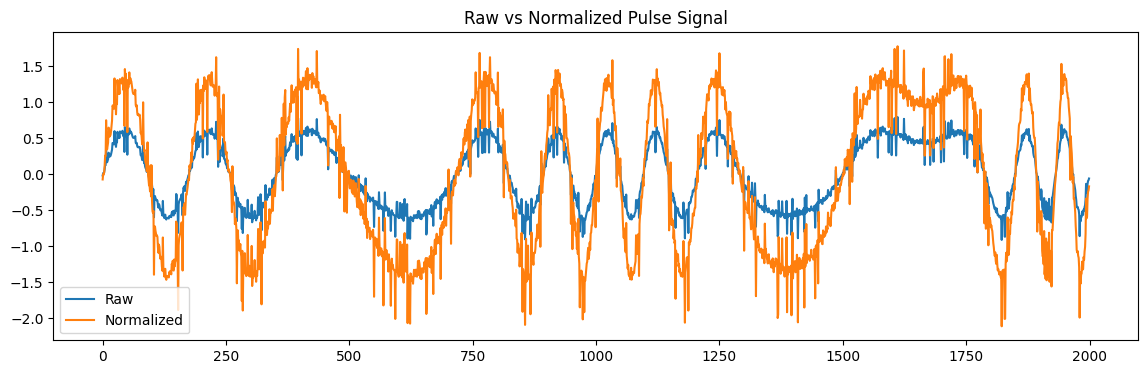

In [3]:
def zscore_normalize(signal):
    return (signal - np.mean(signal)) / np.std(signal)

sample_signal = signals[0]
normalized_signal = zscore_normalize(sample_signal)

plt.figure(figsize=(14,4))
plt.plot(sample_signal, label="Raw")
plt.plot(normalized_signal, label="Normalized")
plt.legend()
plt.title("Raw vs Normalized Pulse Signal")
plt.show()


## Normalization Observations

- Normalization preserves waveform morphology.
- Amplitude variations are reduced.
- Signals become comparable across samples.

In [6]:
from scipy.signal import butter, filtfilt


In [7]:
def bandpass_filter(signal, lowcut, highcut, fs, order=3):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)


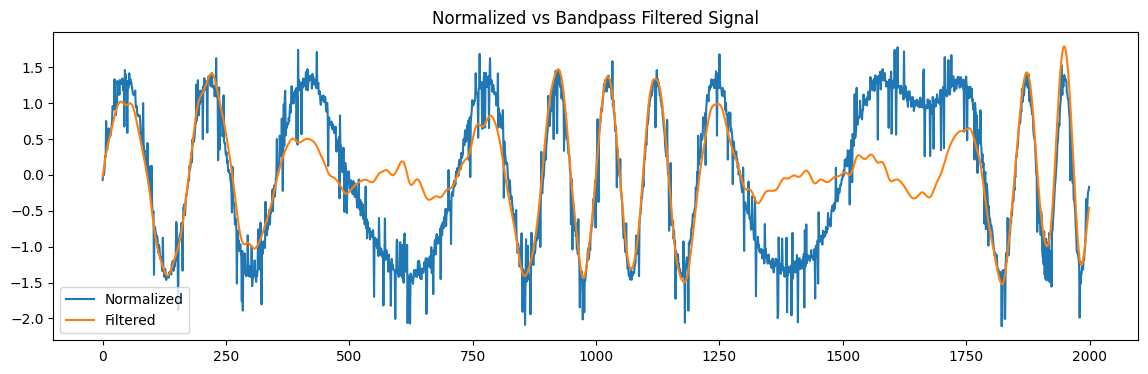

In [8]:
fs = 125  # assumed sampling rate
filtered_signal = bandpass_filter(
    normalized_signal,
    lowcut=0.5,
    highcut=5.0,
    fs=fs
)

plt.figure(figsize=(14,4))
plt.plot(normalized_signal, label="Normalized")
plt.plot(filtered_signal, label="Filtered")
plt.legend()
plt.title("Normalized vs Bandpass Filtered Signal")
plt.show()


## Filtering Observations

- Bandpass filtering reduced baseline drift.
- High-frequency noise was suppressed.
- Pulse oscillations became clearer.

In [9]:
# Apply preprocessing to all signals
processed_signals = []

for i in range(signals.shape[0]):
    signal = signals[i]
    
    # Step 1: Normalize
    norm_signal = zscore_normalize(signal)
    
    # Step 2: Bandpass filter
    filt_signal = bandpass_filter(
        norm_signal,
        lowcut=0.5,
        highcut=5.0,
        fs=fs
    )
    
    processed_signals.append(filt_signal)

processed_signals = np.array(processed_signals)

processed_signals.shape


(2576, 2000)

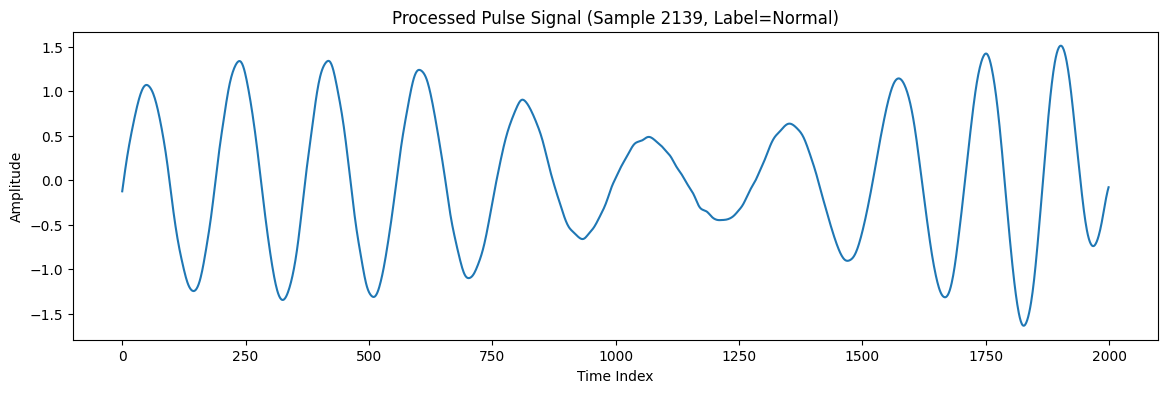

In [11]:
# Plot a random processed signal
idx = np.random.randint(0, processed_signals.shape[0])

plt.figure(figsize=(14,4))
plt.plot(processed_signals[idx])
plt.title(f"Processed Pulse Signal (Sample {idx}, Label={labels[idx]})")
plt.xlabel("Time Index")
plt.ylabel("Amplitude")
plt.show()


In [12]:
np.save("processed_signals.npy", processed_signals)
np.save("labels.npy", labels)


## Phase 2 Summary

- Raw PPG signals were standardized using z-score normalization.
- Bandpass filtering (0.5–5 Hz) was applied to remove baseline drift and high-frequency noise.
- Preprocessing improved waveform clarity while preserving temporal structure.
- The pipeline was validated visually and applied consistently to all samples.